<a href="https://colab.research.google.com/github/AjayKankipati/MVP-Predictor/blob/main/MVP_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dataframe_image
#!pip install shap

import matplotlib.pyplot as plt
from keras.optimizers import Adam

from pathlib import PureWindowsPath
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import mutual_info_regression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from scipy import stats

import dataframe_image as dfi

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
import seaborn as sns

#import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


df = pd.read_csv('drive/MyDrive/NBA_Dataset.csv')
df = df.fillna(0)




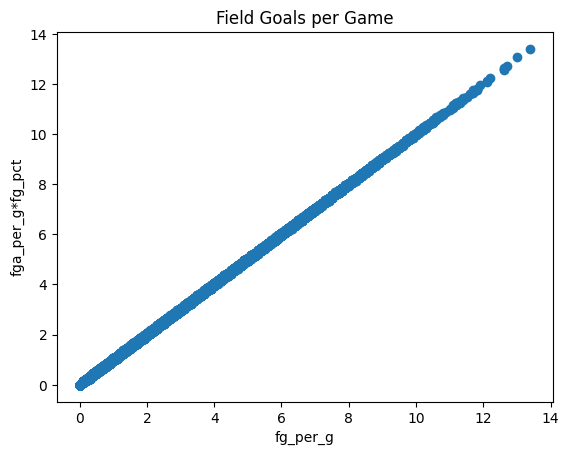

0.999906888323669


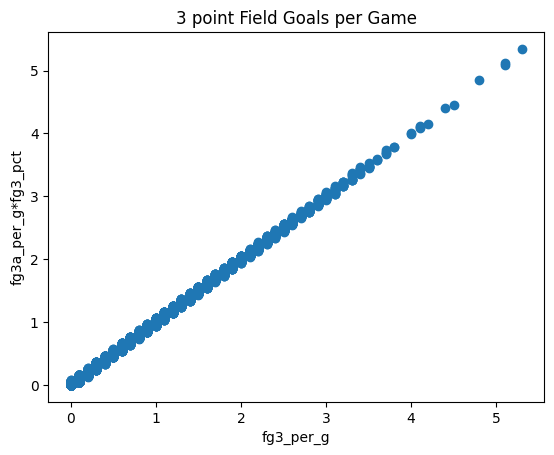

0.9992828378212564


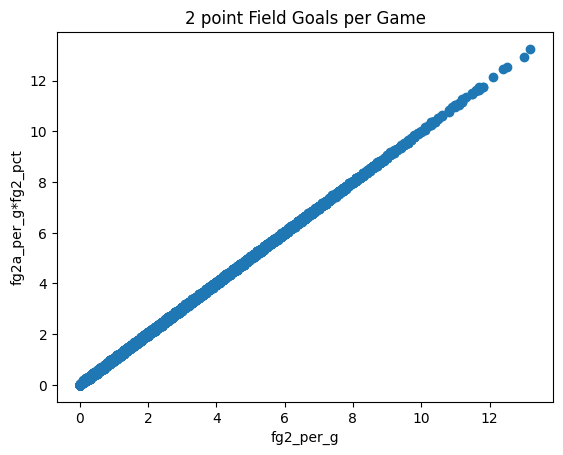

0.9998891951590655


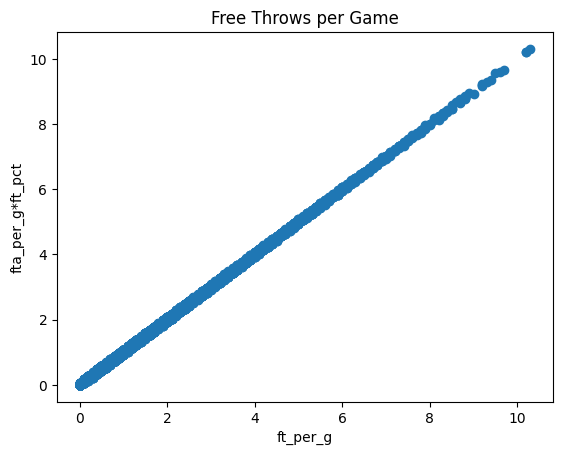

0.999705545985146


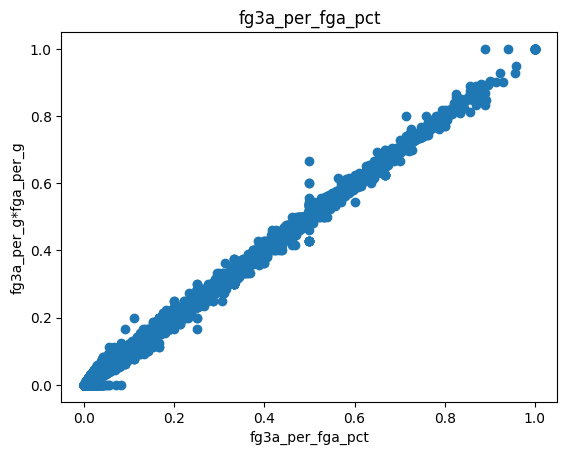

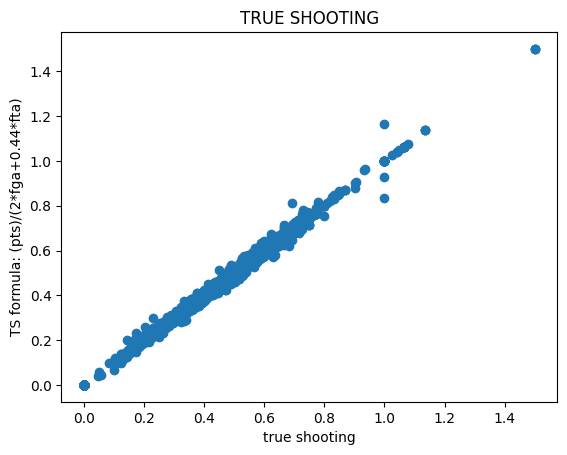

In [ ]:
#method to find linear correlation between 2 stats/combo of stats

def plot_correlation(title, unecessary_stat, param1, param2):
  plt.scatter(df[unecessary_stat], df[param1]*df[param2])
  plt.xlabel(unecessary_stat)
  plt.ylabel(param1 + "*" + param2)
  plt.title(title)
  plt.show()
  prho, pva = stats.pearsonr(df[unecessary_stat], df[param1]*df[param2])
  print(prho)

#plots correlation between first variable and multiplied value of the next two
plot_correlation("Field Goals per Game","fg_per_g", "fga_per_g", "fg_pct")
plot_correlation("3 point Field Goals per Game","fg3_per_g", "fg3a_per_g", "fg3_pct")
plot_correlation("2 point Field Goals per Game","fg2_per_g", "fg2a_per_g", "fg2_pct")
plot_correlation("Free Throws per Game","ft_per_g", "fta_per_g", "ft_pct")

#3point fieldgoal attempts per field goal attempt percentage correlation graph
plt.scatter(df["fg3a_per_fga_pct"], df["fg3a_per_g"]/df["fga_per_g"])
plt.xlabel("fg3a_per_fga_pct")
plt.ylabel("fg3a_per_g" + "*" + "fga_per_g")
plt.title("fg3a_per_fga_pct")
plt.show()

#true shooting correlation graph
plt.scatter(df["ts_pct"], (df["pts_per_g"])/(2*(df["fga_per_g"]+(0.44*df["fta_per_g"]))))
plt.xlabel("true shooting")
plt.ylabel("TS formula: (pts)/(2*fga+0.44*fta)")
plt.title("TRUE SHOOTING")
plt.show()


<ipython-input-8-8844db35a1f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


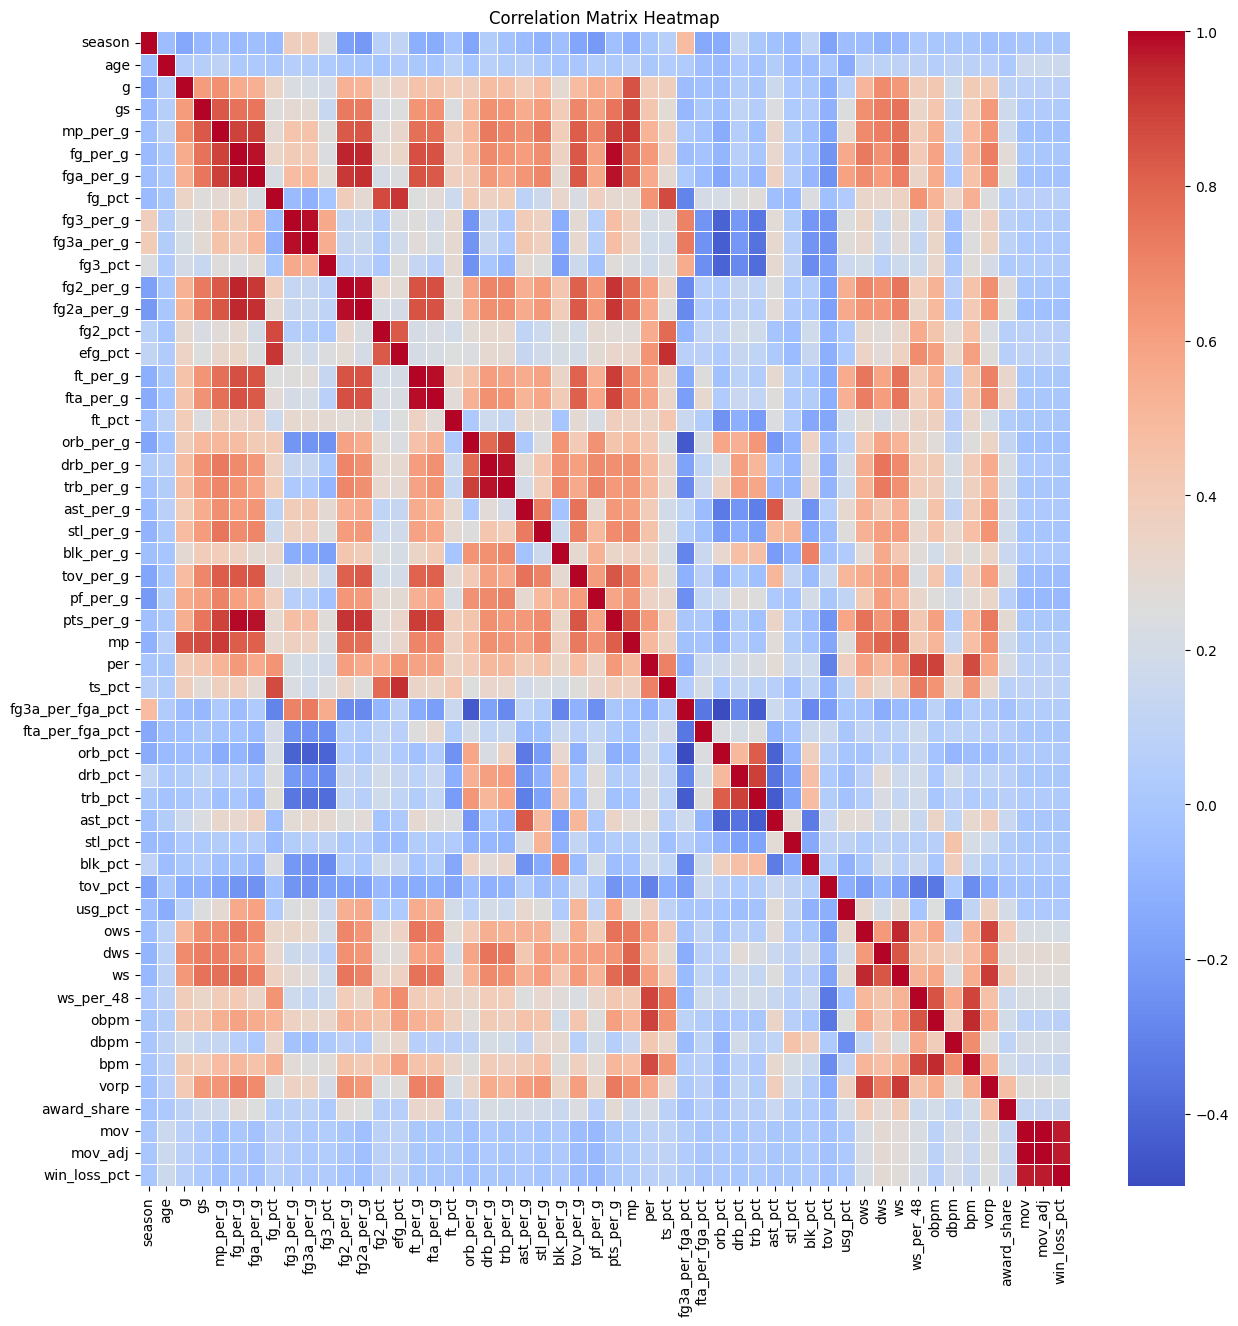

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

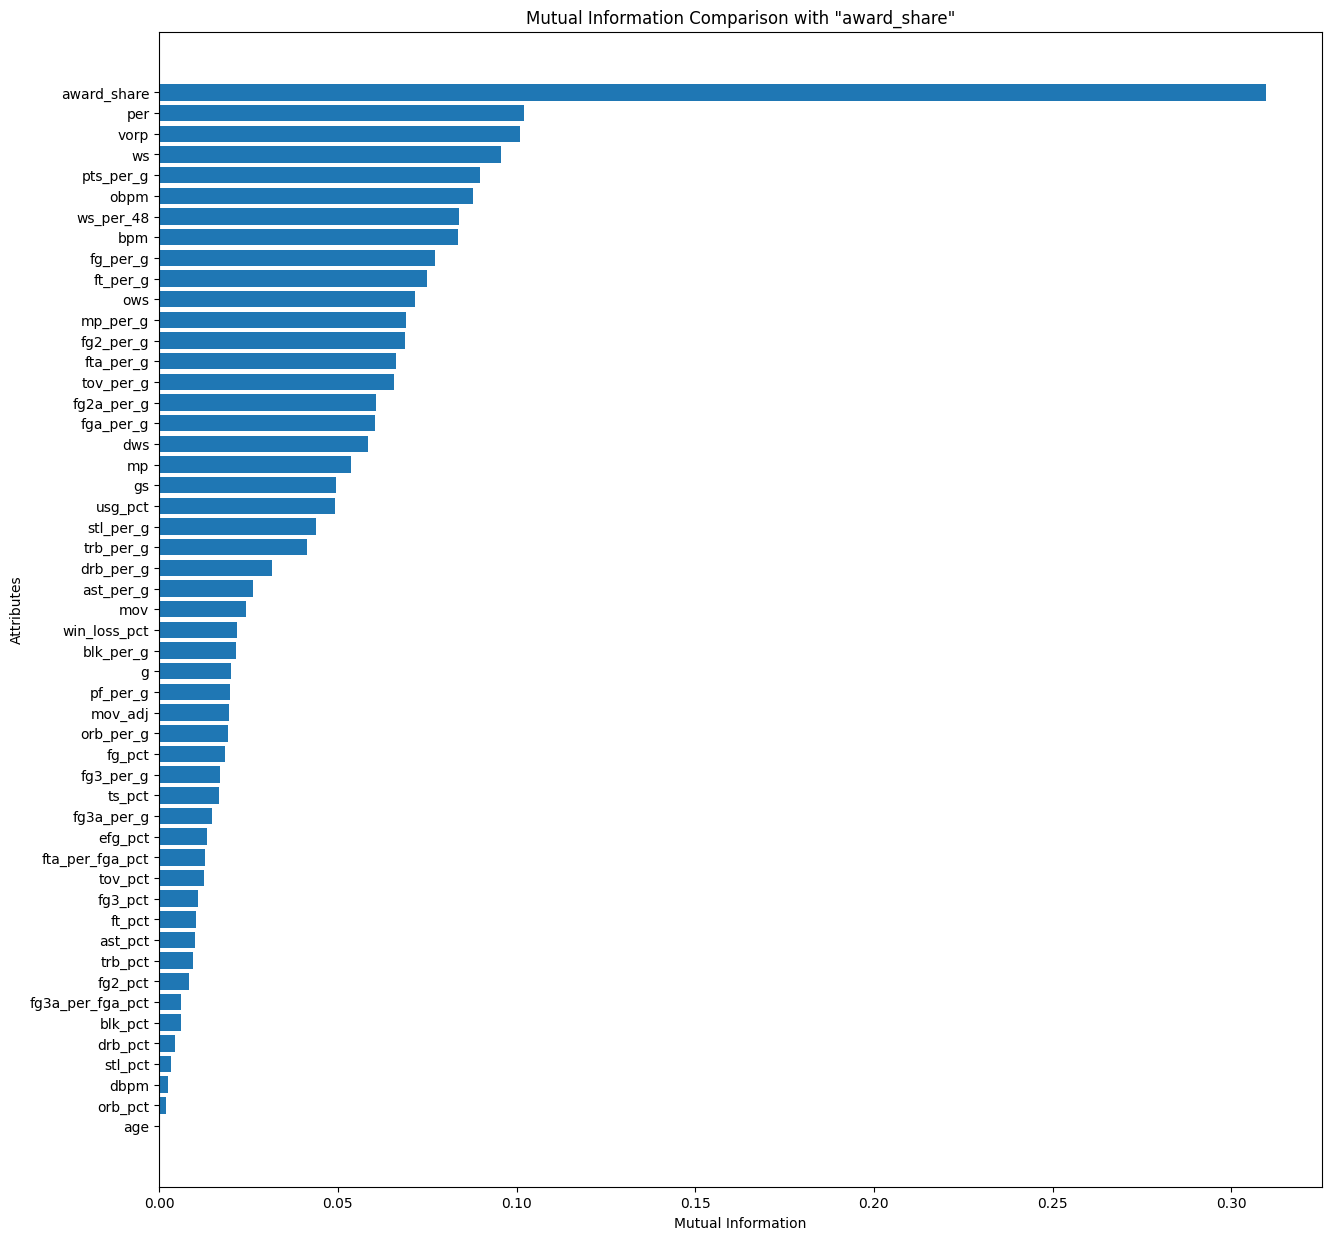

In [ ]:
#Mutual Information Comparison Bar Graph

target_column = 'award_share'
excluded_columns = ['season', 'player', 'pos','team_id']
data = df.copy()
data = data.drop(columns=excluded_columns)

# Convert categorical variables to numerical if needed (e.g., using one-hot encoding)

# Step 2: Compute Mutual Information
mutual_info = {}
for column in data.columns:
    mi = mutual_info_regression(data[[column]], data[target_column])
    mutual_info[column] = mi[0]

# Step 3: Create the Horizontal Bar Plot (Lowest to Highest)
plt.figure(figsize=(15, 15))
sorted_mutual_info = {k: v for k, v in sorted(mutual_info.items(), key=lambda item: item[1])}  # Sort in ascending order
attributes = list(sorted_mutual_info.keys())
mi_values = list(sorted_mutual_info.values())

plt.barh(attributes, mi_values)
plt.xlabel('Mutual Information')
plt.ylabel('Attributes')
plt.title('Mutual Information Comparison with "award_share"')
plt.show()
#this bar graph being made shows a correlation to awardshare that getting mvp points is more related to quantity(more shots taken) rather than efficiency



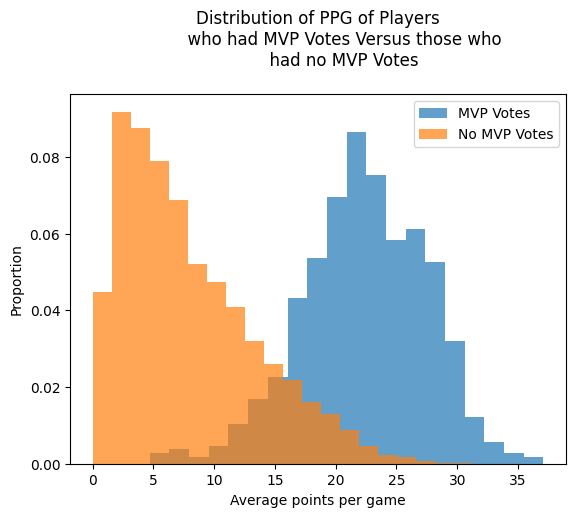

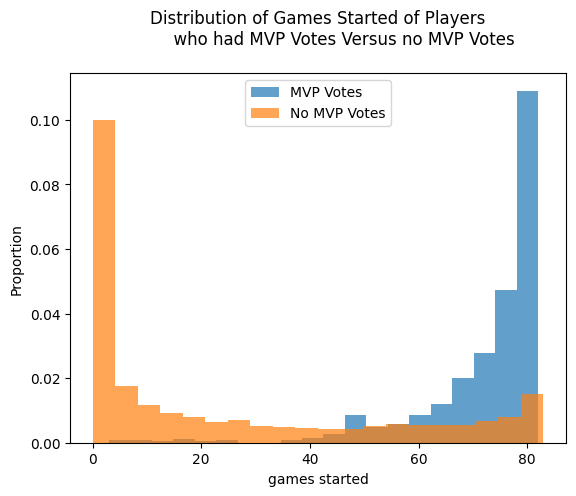

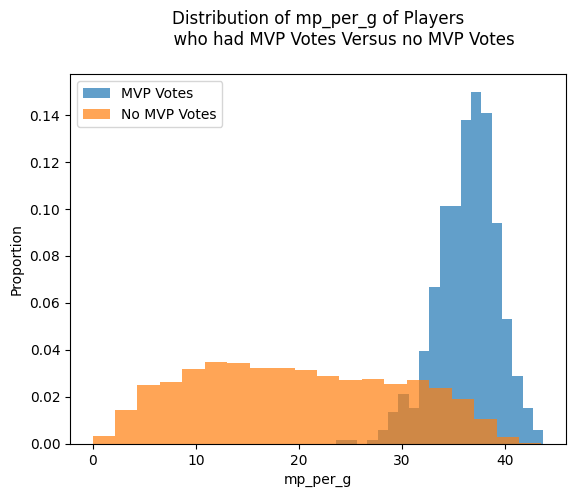

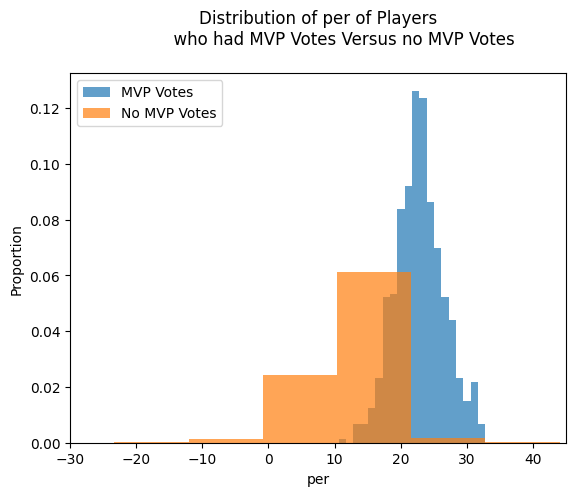

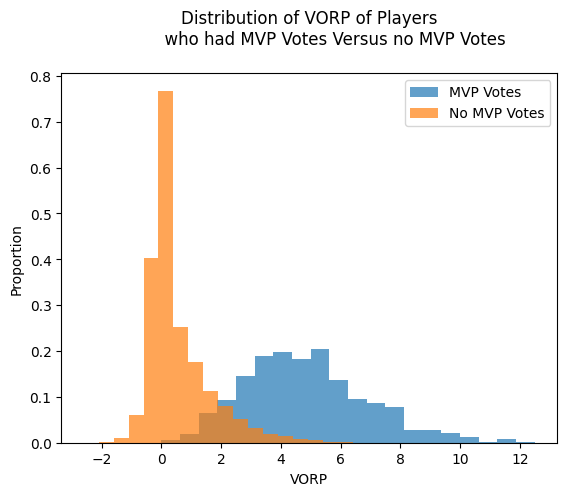

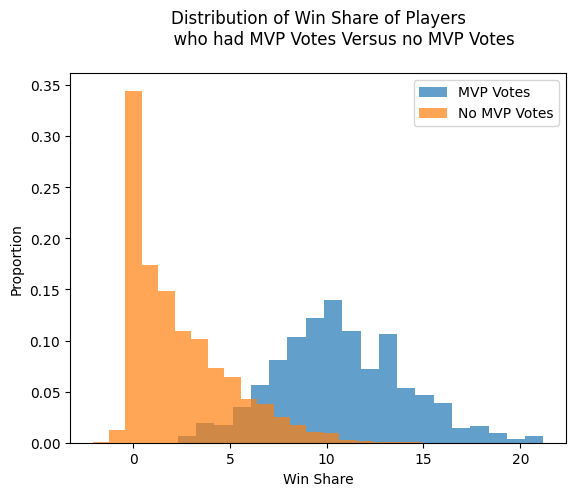

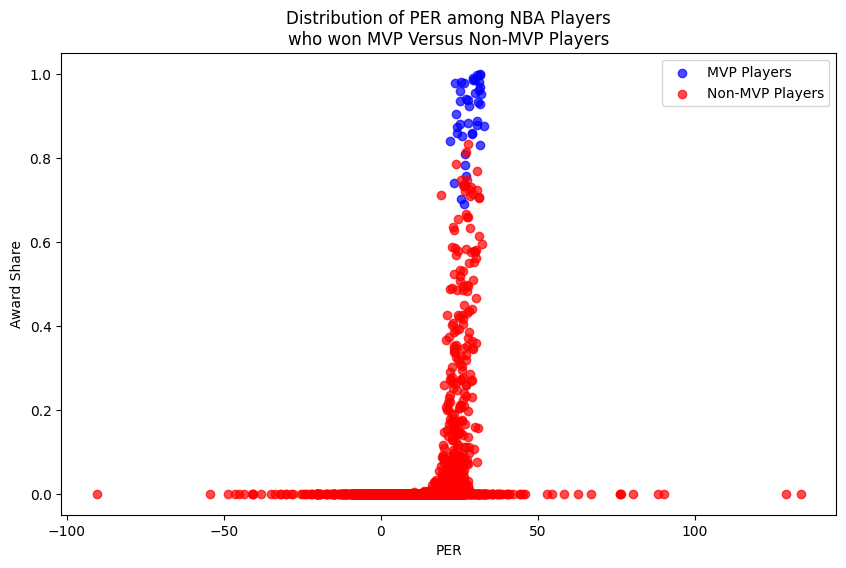

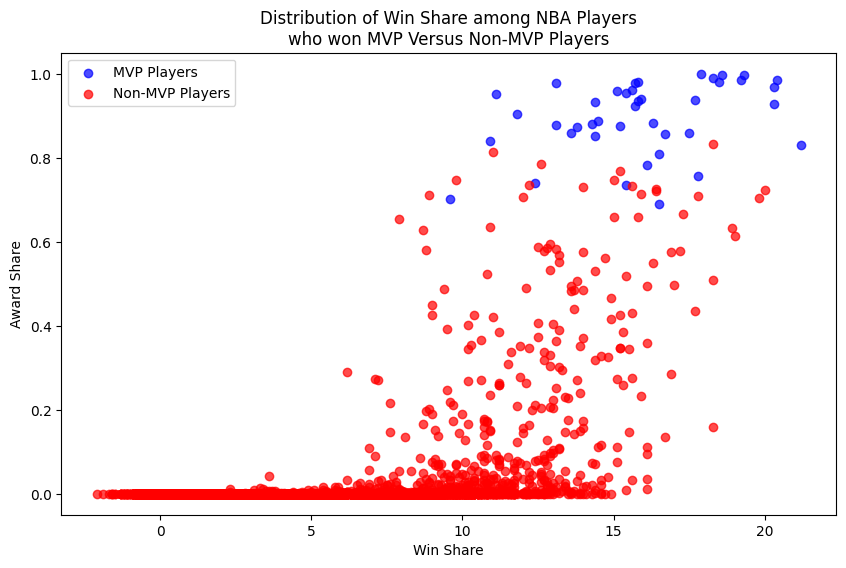

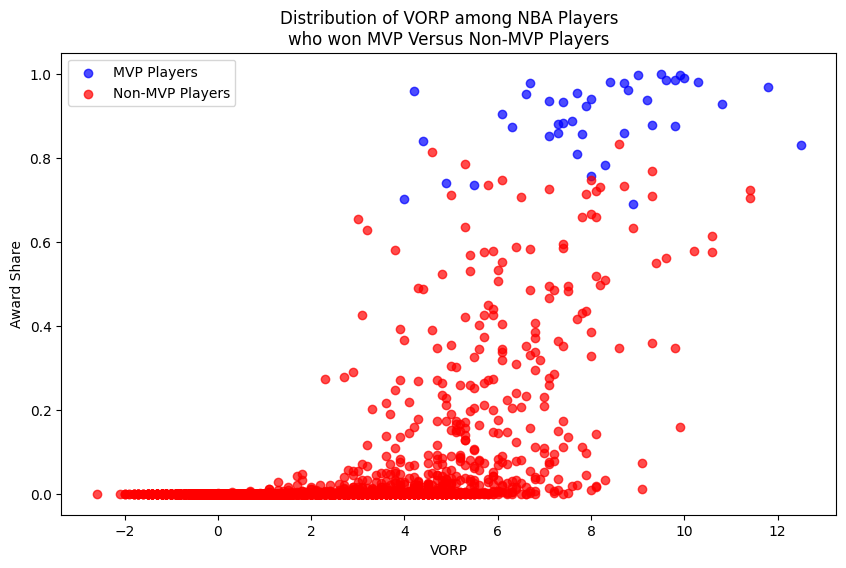

In [ ]:
mvpShares = df[df["award_share"] > 0]
nonMvpShares = df[df["award_share"] == 0]


plt.hist(mvpShares["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Average points per game")

plt.title("""Distribution of PPG of Players
          who had MVP Votes Versus those who
          had no MVP Votes
          """)
plt.legend()
plt.show()

plt.hist(mvpShares["gs"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["gs"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("games started")
plt.title("""Distribution of Games Started of Players
          who had MVP Votes Versus no MVP Votes
          """)
plt.legend()
plt.show()

plt.hist(mvpShares["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("mp_per_g")
plt.title("""Distribution of mp_per_g of Players
          who had MVP Votes Versus no MVP Votes
          """)
plt.legend()
plt.show()

plt.hist(mvpShares["per"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["per"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("per")
plt.title("""Distribution of per of Players
          who had MVP Votes Versus no MVP Votes
          """)
plt.xlim(xmin=-30, xmax=45)
plt.legend()
plt.show()

plt.hist(mvpShares["vorp"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["vorp"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("VORP")
plt.title("""Distribution of VORP of Players
          who had MVP Votes Versus no MVP Votes
          """)
plt.legend()
plt.show()

plt.hist(mvpShares["ws"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["ws"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Win Share")
plt.title("""Distribution of Win Share of Players
          who had MVP Votes Versus no MVP Votes
          """)
plt.legend()
plt.show()



mvps = df.groupby(by = "season").max('award_share')
mvps["was_mvp"] = True
df = df.merge(mvps[["award_share", "was_mvp"]], on = ["season", "award_share"], how = "left")
df["was_mvp"] = df["was_mvp"].fillna(value = False)





print("\n")

mvp_players = df[df["was_mvp"]]
non_mvp_players = df[~df["was_mvp"]]
plt.figure(figsize=(10, 6))



plt.scatter(mvp_players["per"], mvp_players["award_share"], alpha=0.7, label="MVP Players", color="blue")
plt.scatter(non_mvp_players["per"], non_mvp_players["award_share"], alpha=0.7, label="Non-MVP Players", color="red")

plt.xlabel("PER")
plt.ylabel("Award Share")
plt.title("Distribution of PER among NBA Players\nwho won MVP Versus Non-MVP Players")
plt.legend()
plt.show()

print("\n")

plt.figure(figsize=(10, 6))

plt.scatter(mvp_players["ws"], mvp_players["award_share"], alpha=0.7, label="MVP Players", color="blue")
plt.scatter(non_mvp_players["ws"], non_mvp_players["award_share"], alpha=0.7, label="Non-MVP Players", color="red")

plt.xlabel("Win Share")
plt.ylabel("Award Share")
plt.title("Distribution of Win Share among NBA Players\nwho won MVP Versus Non-MVP Players")
plt.legend()
plt.show()

print("\n")

plt.figure(figsize=(10, 6))

plt.scatter(mvp_players["vorp"], mvp_players["award_share"], alpha=0.7, label="MVP Players", color="blue")
plt.scatter(non_mvp_players["vorp"], non_mvp_players["award_share"], alpha=0.7, label="Non-MVP Players", color="red")

plt.xlabel("VORP")
plt.ylabel("Award Share")
plt.title("Distribution of VORP among NBA Players\nwho won MVP Versus Non-MVP Players")
plt.legend()
plt.show()





In [ ]:

print(mvpShares[mvpShares["gs"] < 30][["season", "player", "g", "gs",'pts_per_g', 'award_share']].reset_index(drop = True))
print("\n")
print(mvpShares[mvpShares["mp_per_g"] < 25][["season", "player", "mp_per_g", "g",'trb_per_g', 'award_share']].reset_index(drop = True))
print("\n")
print(mvpShares[mvpShares["pts_per_g"] < 5][["season", "player", "pts_per_g", "g",'dbpm', 'award_share']].reset_index(drop = True))
print("\n")
#showing rodman defensive impact which is what earned him slight award share
print(mvpShares[(mvpShares["dbpm"] >= 0.3) & (mvpShares["season"] == 1994) & (mvpShares["blk_pct"] >=0.7)][["season", "player", "g", "blk_pct", "dbpm", 'award_share']].reset_index(drop=True))
print("\n")
print(mvpShares[(mvpShares["per"] < 14)][["season", "player", "per", 'award_share']].reset_index(drop = True))
print("\n")
print(mvpShares[(mvpShares["per"] >= 31)][["season", "player", "per", 'award_share']].reset_index(drop = True))



    season             player   g  gs  pts_per_g  award_share
0     1982     Michael Cooper  76  14       11.9        0.004
1     1991       Kevin McHale  68  10       18.4        0.001
2     1992    Detlef Schrempf  80   4       17.3        0.001
3     1995     Michael Jordan  17  17       26.9        0.011
4     1995      Dennis Rodman  49  26        7.1        0.009
5     1996      Magic Johnson  32   9       14.6        0.007
6     1999  Darrell Armstrong  50  15       13.8        0.002
7     1999    Rasheed Wallace  49  18       12.8        0.001
8     2008      Manu Ginóbili  74  23       19.5        0.007
9     2010      Manu Ginóbili  75  21       16.5        0.002
10    2021       Derrick Rose  50   3       14.7        0.010


   season        player  mp_per_g   g  trb_per_g  award_share
0    1983  Alton Lister      23.6  80        7.1        0.007


   season         player  pts_per_g   g  dbpm  award_share
0    1994  Dennis Rodman        4.7  79   0.3        0.001


    seas

In [ ]:
#removing players with under 20 games played, under 23.6 minutes per game and under 4.7 points per game and per below 13.4 or above 33
df = df[df["gs"] > 26]
df = df.reset_index(drop = True)
df = df[df["mp_per_g"] >= 23.6]
df = df.reset_index(drop = True)
df = df[df["pts_per_g"] >= 4.7]
df = df.reset_index(drop = True)
df = df[(df["per"] >= 13.4) & (df["per"] <= 33)]
df = df.reset_index(drop = True)
#removing these stats cuz they have minor to no correlation with award share
df = df.drop(columns=["fg_per_g", "fg3_per_g","fg2_per_g", "ft_per_g", "fg3a_per_fga_pct", "drb_pct","orb_pct", "blk_pct", "tov_pct","pf_per_g","trb_pct","orb_per_g"])

print("\n")


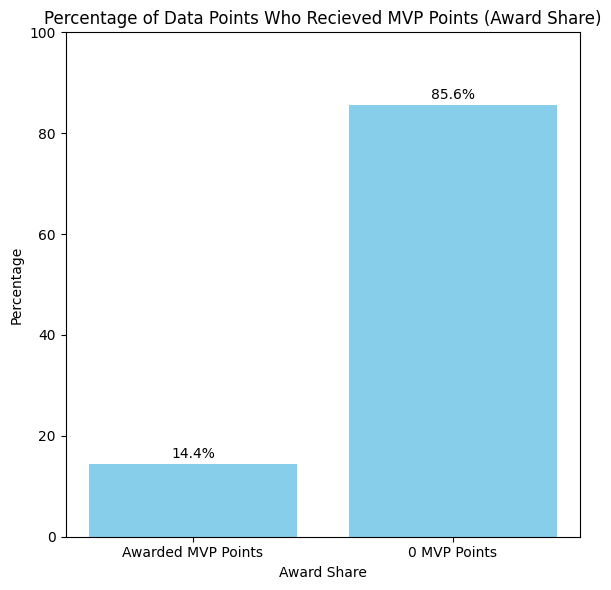

In [ ]:
#graphing mvp_share to non_mvp_share
total_data_points = len(df)
positive_award_share = len(df[df['award_share'] > 0])
zero_award_share = len(df[df['award_share'] == 0])

percentage_positive = (positive_award_share / total_data_points) * 100
percentage_zero = (zero_award_share / total_data_points) * 100

categories = ['Awarded MVP Points', '0 MVP Points']
percentages = [percentage_positive, percentage_zero]



# Create the bar graph
plt.figure(figsize=(6, 6))
plt.bar(categories, percentages, color='skyblue')
plt.xlabel('Award Share')
plt.ylabel('Percentage')
plt.title('Percentage of Data Points Who Recieved MVP Points (Award Share)')
plt.ylim(0, 100)
for i in range(len(categories)):
    plt.text(i, percentages[i] + 2, f'{percentages[i]:.1f}%', ha='center', va='center')
plt.tight_layout()
plt.show()



<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1983):
            player  award_share
493   Moses Malone        0.960
331     Larry Bird        0.485
447  Magic Johnson        0.406


Top 3 Predicted Players with Highest Predicted Award Share (Season 1983):
            player  predicted_award_share
331     Larry Bird               0.185064
447  Magic Johnson               0.139801
399  Julius Erving               0.126323


Top 3 Players with Highest Actual Award Share (Season 1984):
            player  award_share
647     Larry Bird        0.858
777   Bernard King        0.491
759  Magic Johnson        0.401


Top 3 Predicted Players with Highest Predicted Award Share (Season 1984):
             player  predicted_award_share
647      Larry Bird               0.174454
687  Adrian Dantley               0.123115
777    Bernard King               0.120860


Top 3 Players with Highest Actual Award Share (Season 1985):
             player  award_share
957      Larry Bird        0.978

<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1986):
                 player  award_share
1278         Larry Bird        0.981
1566  Dominique Wilkins        0.522
1394      Magic Johnson        0.263


Top 3 Predicted Players with Highest Predicted Award Share (Season 1986):
                   player  predicted_award_share
1278           Larry Bird               0.195820
1323       Adrian Dantley               0.137087
1262  Kareem Abdul-Jabbar               0.129488


Top 3 Players with Highest Actual Award Share (Season 1987):
              player  award_share
1719   Magic Johnson        0.940
1727  Michael Jordan        0.576
1608      Larry Bird        0.347


Top 3 Predicted Players with Highest Predicted Award Share (Season 1987):
              player  predicted_award_share
1727  Michael Jordan               0.260489
1608      Larry Bird               0.197401
1719   Magic Johnson               0.196047




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1988):
              player  award_share
2067  Michael Jordan        0.831
1944      Larry Bird        0.659
2061   Magic Johnson        0.635


Top 3 Predicted Players with Highest Predicted Award Share (Season 1988):
               player  predicted_award_share
2067   Michael Jordan               0.315328
1944       Larry Bird               0.195363
1938  Charles Barkley               0.192923




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1989):
              player  award_share
2407   Magic Johnson        0.782
2416  Michael Jordan        0.704
2450     Karl Malone        0.426


Top 3 Predicted Players with Highest Predicted Award Share (Season 1989):
               player  predicted_award_share
2416   Michael Jordan               0.295565
2407    Magic Johnson               0.197938
2271  Charles Barkley               0.174677




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1990):
               player  award_share
2767    Magic Johnson        0.691
2624  Charles Barkley        0.667
2775   Michael Jordan        0.613


Top 3 Predicted Players with Highest Predicted Award Share (Season 1990):
              player  predicted_award_share
2775  Michael Jordan               0.266280
2767   Magic Johnson               0.206531
2813     Karl Malone               0.199785




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1991):
              player  award_share
3162  Michael Jordan        0.928
3158   Magic Johnson        0.518
3274  David Robinson        0.496


Top 3 Predicted Players with Highest Predicted Award Share (Season 1991):
              player  predicted_award_share
3162  Michael Jordan               0.272986
3274  David Robinson               0.213561
3158   Magic Johnson               0.189243


Top 3 Players with Highest Actual Award Share (Season 1992):
              player  award_share
3554  Michael Jordan        0.938
3470   Clyde Drexler        0.584
3669  David Robinson        0.351


Top 3 Predicted Players with Highest Predicted Award Share (Season 1992):
              player  predicted_award_share
3554  Michael Jordan               0.232504
3589     Karl Malone               0.174070
3470   Clyde Drexler               0.170235


Top 3 Players with Highest Actual Award Share (Season 1993):


<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


               player  award_share
3784  Charles Barkley        0.852
4016  Hakeem Olajuwon        0.660
3937   Michael Jordan        0.577


Top 3 Predicted Players with Highest Predicted Award Share (Season 1993):
               player  predicted_award_share
3937   Michael Jordan               0.249451
3977      Karl Malone               0.205394
4016  Hakeem Olajuwon               0.196530




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1994):
               player  award_share
4425  Hakeem Olajuwon        0.880
4463   David Robinson        0.723
4446   Scottie Pippen        0.386


Top 3 Predicted Players with Highest Predicted Award Share (Season 1994):
                player  predicted_award_share
4463    David Robinson               0.311046
4422  Shaquille O'Neal               0.219064
4425   Hakeem Olajuwon               0.188207




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1995):
                player  award_share
4859    David Robinson        0.858
4817  Shaquille O'Neal        0.576
4774       Karl Malone        0.507


Top 3 Predicted Players with Highest Predicted Award Share (Season 1995):
                player  predicted_award_share
4859    David Robinson               0.232483
4817  Shaquille O'Neal               0.180673
4774       Karl Malone               0.164328


Top 3 Players with Highest Actual Award Share (Season 1996):

<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred



                 player  award_share
5150     Michael Jordan        0.986
5283     David Robinson        0.508
5114  Anfernee Hardaway        0.319


Top 3 Predicted Players with Highest Predicted Award Share (Season 1996):
              player  predicted_award_share
5150  Michael Jordan               0.248995
5283  David Robinson               0.210578
5185     Karl Malone               0.186506


Top 3 Players with Highest Actual Award Share (Season 1997):
              player  award_share
5617     Karl Malone        0.857
5581  Michael Jordan        0.832
5557      Grant Hill        0.327


Top 3 Predicted Players with Highest Predicted Award Share (Season 1997):
              player  predicted_award_share
5581  Michael Jordan               0.222720
5617     Karl Malone               0.221884
5557      Grant Hill               0.207144




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 1998):
              player  award_share
6033  Michael Jordan        0.934
6066     Karl Malone        0.726
6127     Gary Payton        0.372


Top 3 Predicted Players with Highest Predicted Award Share (Season 1998):
              player  predicted_award_share
6066     Karl Malone               0.217576
6033  Michael Jordan               0.197536
6161  David Robinson               0.182473


Top 3 Players with Highest Actual Award Share (Season 1999):
               player  award_share
6500      Karl Malone        0.701
6538  Alonzo Mourning        0.655
6380       Tim Duncan        0.627


Top 3 Predicted Players with Highest Predicted Award Share (Season 1999):
                player  predicted_award_share
6554  Shaquille O'Neal               0.147647
6500       Karl Malone               0.124867
6447     Allen Iverson               0.107916




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2000):
                player  award_share
7003  Shaquille O'Neal        0.998
6849     Kevin Garnett        0.337
6989   Alonzo Mourning        0.303


Top 3 Predicted Players with Highest Predicted Award Share (Season 2000):
                player  predicted_award_share
7003  Shaquille O'Neal               0.286693
6952       Karl Malone               0.207534
7020       Gary Payton               0.169388


Top 3 Players with Highest Actual Award Share (Season 2001):
                player  award_share
7334     Allen Iverson        0.904
7259        Tim Duncan        0.569
7443  Shaquille O'Neal        0.466


Top 3 Predicted Players with Highest Predicted Award Share (Season 2001):
                player  predicted_award_share
7443  Shaquille O'Neal               0.256118
7384       Karl Malone               0.177607
7402     Tracy McGrady               0.171361


Top 3 Players with Highest Actual Award Share (Season 2002):
     

<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Top 3 Players with Highest Actual Award Share (Season 2003):
             player  award_share
8138     Tim Duncan        0.808
8160  Kevin Garnett        0.732
8086    Kobe Bryant        0.417


Top 3 Predicted Players with Highest Predicted Award Share (Season 2003):
             player  predicted_award_share
8277  Tracy McGrady               0.247566
8160  Kevin Garnett               0.228225
8138     Tim Duncan               0.223841


Top 3 Players with Highest Actual Award Share (Season 2004):
               player  award_share
8600    Kevin Garnett        0.991
8575       Tim Duncan        0.582
8753  Jermaine O'Neal        0.425


Top 3 Predicted Players with Highest Predicted Award Share (Season 2004):
             player  predicted_award_share
8600  Kevin Garnett               0.272273
8575     Tim Duncan               0.202333
8719  Tracy McGrady               0.146537


Top 3 Players with Highest Actual Award Share (Season 2005):
                player  award_share
9201     

<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2006):
             player  award_share
9658     Steve Nash        0.739
9570   LeBron James        0.550
9664  Dirk Nowitzki        0.435


Top 3 Predicted Players with Highest Predicted Award Share (Season 2006):
             player  predicted_award_share
9570   LeBron James               0.272928
9422    Kobe Bryant               0.219541
9664  Dirk Nowitzki               0.218149


Top 3 Players with Highest Actual Award Share (Season 2007):
              player  award_share
10123  Dirk Nowitzki        0.882
10116     Steve Nash        0.785
9885     Kobe Bryant        0.404


Top 3 Predicted Players with Highest Predicted Award Share (Season 2007):
              player  predicted_award_share
10028   LeBron James               0.224773
10123  Dirk Nowitzki               0.199762
9935      Tim Duncan               0.174402




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2008):
              player  award_share
10345    Kobe Bryant        0.873
10599     Chris Paul        0.710
10423  Kevin Garnett        0.532


Top 3 Predicted Players with Highest Predicted Award Share (Season 2008):
              player  predicted_award_share
10490   LeBron James               0.275839
10599     Chris Paul               0.200694
10581  Dirk Nowitzki               0.158646




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2009):
             player  award_share
10938  LeBron James        0.969
10798   Kobe Bryant        0.577
11136   Dwyane Wade        0.562


Top 3 Predicted Players with Highest Predicted Award Share (Season 2009):
             player  predicted_award_share
10938  LeBron James               0.322097
11136   Dwyane Wade               0.239540
11047    Chris Paul               0.235360




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2010):
             player  award_share
11397  LeBron James        0.980
11300  Kevin Durant        0.495
11243   Kobe Bryant        0.487


Top 3 Predicted Players with Highest Predicted Award Share (Season 2010):
             player  predicted_award_share
11397  LeBron James               0.291237
11580   Dwyane Wade               0.202256
11300  Kevin Durant               0.191472




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2011):
              player  award_share
11973   Derrick Rose        0.977
11828  Dwight Howard        0.531
11843   LeBron James        0.431


Top 3 Predicted Players with Highest Predicted Award Share (Season 2011):
              player  predicted_award_share
11843   LeBron James               0.216060
11828  Dwight Howard               0.170745
11973   Derrick Rose               0.160685




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2012):
             player  award_share
12303  LeBron James        0.888
12195  Kevin Durant        0.735
12417    Chris Paul        0.318


Top 3 Predicted Players with Highest Predicted Award Share (Season 2012):
              player  predicted_award_share
12303   LeBron James               0.208458
12195   Kevin Durant               0.169593
12288  Dwight Howard               0.130376




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2013):
                player  award_share
12760     LeBron James        0.998
12667     Kevin Durant        0.632
12563  Carmelo Anthony        0.393


Top 3 Predicted Players with Highest Predicted Award Share (Season 2013):
             player  predicted_award_share
12760  LeBron James               0.268786
12667  Kevin Durant               0.237615
12717  James Harden               0.133206




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2014):
              player  award_share
13150   Kevin Durant        0.986
13243   LeBron James        0.713
13197  Blake Griffin        0.347


Top 3 Predicted Players with Highest Predicted Award Share (Season 2014):
             player  predicted_award_share
13150  Kevin Durant               0.269572
13243  LeBron James               0.214121
13294    Kevin Love               0.196840




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2015):
              player  award_share
13610  Stephen Curry        0.922
13696   James Harden        0.720
13734   LeBron James        0.425


Top 3 Predicted Players with Highest Predicted Award Share (Season 2015):
                  player  predicted_award_share
13696       James Harden               0.210150
13968  Russell Westbrook               0.172733
13610      Stephen Curry               0.169348


Top 3 Players with Highest Actual Award Share (Season 2016):
              player  award_share
14095  Stephen Curry        1.000
14253  Kawhi Leonard        0.484
14212   LeBron James        0.482


Top 3 Predicted Players with Highest Predicted Award Share (Season 2016):
              player  predicted_award_share
14116   Kevin Durant               0.217851
14095  Stephen Curry               0.212806
14212   LeBron James               0.211863


Top 3 Players with Highest Actual Award Share (Season 2017):
                  pla

<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred





Top 3 Predicted Players with Highest Predicted Award Share (Season 2017):
                  player  predicted_award_share
14924  Russell Westbrook               0.280007
14639       James Harden               0.230057
14687       LeBron James               0.199848




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2018):
              player  award_share
15147   James Harden        0.955
15201   LeBron James        0.731
15074  Anthony Davis        0.441


Top 3 Predicted Players with Highest Predicted Award Share (Season 2018):
                  player  predicted_award_share
15201       LeBron James               0.235155
15147       James Harden               0.207305
15460  Russell Westbrook               0.178320




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2019):
                      player  award_share
15510  Giannis Antetokounmpo        0.932
15699           James Harden        0.768
15676            Paul George        0.352


Top 3 Predicted Players with Highest Predicted Award Share (Season 2019):
                      player  predicted_award_share
15699           James Harden               0.244672
15510  Giannis Antetokounmpo               0.240736
15762           Nikola Jokić               0.178186




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2020):
                      player  award_share
16035  Giannis Antetokounmpo        0.952
16273           LeBron James        0.746
16221           James Harden        0.363


Top 3 Predicted Players with Highest Predicted Award Share (Season 2020):
                      player  predicted_award_share
16035  Giannis Antetokounmpo               0.239732
16221           James Harden               0.192658
16156            Luka Dončić               0.172434




<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred
<ipython-input-8-68d509a7e51b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data['predicted_award_share'] = y_pred


Top 3 Players with Highest Actual Award Share (Season 2021):
              player  award_share
16814   Nikola Jokić        0.961
16697    Joel Embiid        0.580
16667  Stephen Curry        0.449


Top 3 Predicted Players with Highest Predicted Award Share (Season 2021):
                      player  predicted_award_share
16814           Nikola Jokić               0.217056
16563  Giannis Antetokounmpo               0.185521
16681            Luka Dončić               0.153274


Top 3 Players with Highest Actual Award Share (Season 2022):
                      player  award_share
17381           Nikola Jokić        0.875
17253            Joel Embiid        0.706
17103  Giannis Antetokounmpo        0.595


Top 3 Predicted Players with Highest Predicted Award Share (Season 2022):
                      player  predicted_award_share
17381           Nikola Jokić               0.269224
17103  Giannis Antetokounmpo               0.236222
17253            Joel Embiid               0.184318


To

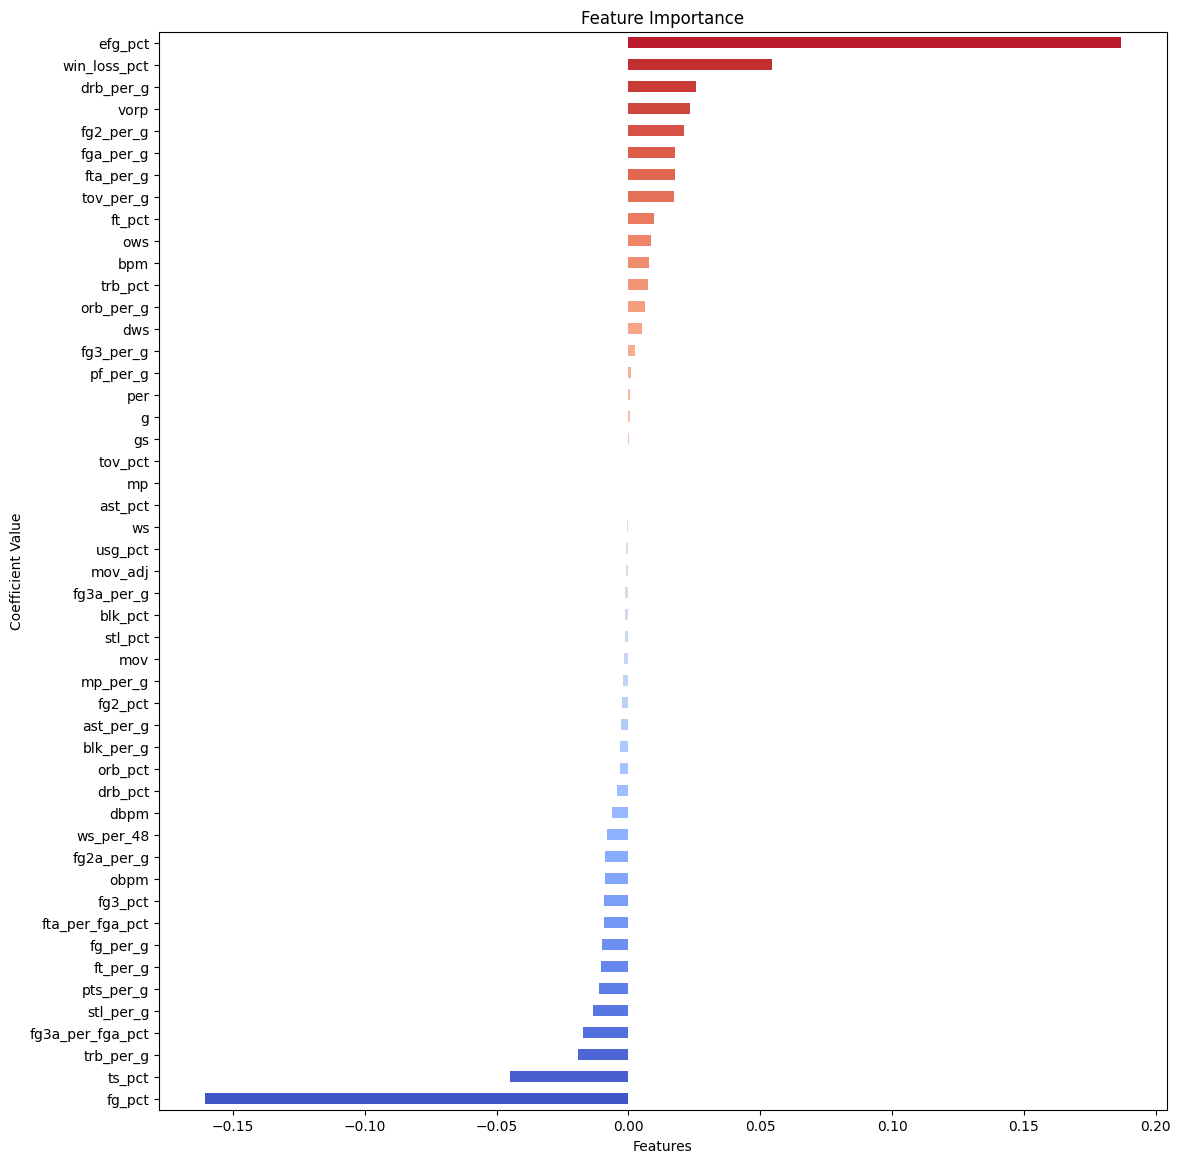

In [ ]:

# LINEAR REGRESSION APPROACH #
from sklearn.linear_model import LinearRegression

mvp_appearances = 0

feature_coefficients = []

for season in range(1983, 2023):
    df_train_data = df[(df["season"] < season) | (df["season"] > season)]
    df_test_data = df[df["season"] == season]

    X_train = df_train_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])
    X_test = df_test_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])

    y_train = df_train_data['award_share']
    y_test = df_test_data['award_share']

    model = LinearRegression()
    model.fit(X_train, y_train)

    feature_names = X_train.columns
    coefficients = model.coef_

    # Store feature names and coefficients in a list
    feature_coefficients.append(dict(zip(feature_names, coefficients)))

    # Predict award_share values for the test data
    y_pred = model.predict(X_test)

    # Add the predicted award_share values to the test data
    df_test_data['predicted_award_share'] = y_pred

    # Sort the test data by predicted award_share values in descending order
    sorted_test_data = df_test_data.sort_values(by='predicted_award_share', ascending=False)

    # Print the top 3 players with the highest predicted and actual award_share
    top_predicted_players = sorted_test_data.head(3)

    top_actual_players = sorted_test_data.nlargest(3, 'award_share')

    print(f"Top 3 Players with Highest Actual Award Share (Season {season}):")
    print(top_actual_players[['player', 'award_share']])
    print("\n")

    print(f"Top 3 Predicted Players with Highest Predicted Award Share (Season {season}):")
    print(top_predicted_players[['player', 'predicted_award_share']])
    print("\n")

    # Check if the actual MVP is in the predicted top 3
    actual_mvp_name = top_actual_players.iloc[0]['player']
    if actual_mvp_name in top_predicted_players['player'].values:
        mvp_appearances += 1

# Print the total number of times the actual MVP appeared in predicted top 3
print(f"Total MVP Appearances in Predicted Top 3: {mvp_appearances}")

all_coefficients = pd.DataFrame(feature_coefficients)

# Calculate average coefficients for each feature
average_coefficients = all_coefficients.mean()

# Sort average coefficients in descending order
sorted_coefficients = average_coefficients.sort_values(ascending=True)

cmap = sns.color_palette("coolwarm", n_colors=len(sorted_coefficients))


# Plot feature importance using a bar graph
plt.figure(figsize=(13, 14))
sorted_coefficients.plot(kind='barh', color=cmap)
plt.title("Feature Importance")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.show()








Epoch 1/40
137/137 [==============================] - 5s 7ms/step - loss: 810.0417 - accuracy: 0.4711
Epoch 2/40
137/137 [==============================] - 1s 6ms/step - loss: 1.1691 - accuracy: 0.5135
Epoch 3/40
137/137 [==============================] - 1s 5ms/step - loss: 0.8286 - accuracy: 0.5493
Epoch 4/40
137/137 [==============================] - 1s 5ms/step - loss: 0.5911 - accuracy: 0.5979
Epoch 5/40
137/137 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.6314
Epoch 6/40
137/137 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.6610
Epoch 7/40
137/137 [==============================] - 1s 4ms/step - loss: 0.2483 - accuracy: 0.6938
Epoch 8/40
137/137 [==============================] - 1s 4ms/step - loss: 0.2097 - accuracy: 0.7128
Epoch 9/40
137/137 [==============================] - 1s 5ms/step - loss: 0.1777 - accuracy: 0.7323
Epoch 10/40
137/137 [==============================] - 1s 5ms/step - loss: 0.1532 - accuracy: 0.74

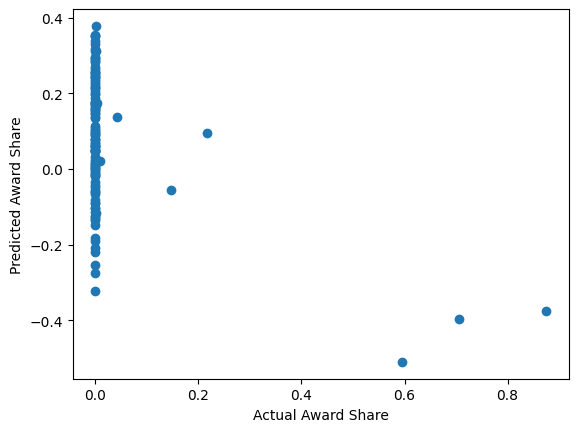

4/4 [==============================] - 0s 4ms/step - loss: 0.0639 - accuracy: 0.9008
Top 3 Predicted Award Shares:
1. Player Name: Chris Paul --> Predicted Award Share: 0.37803155183792114
2. Player Name: Clint Capela --> Predicted Award Share: 0.3544042110443115
3. Player Name: Kyrie Irving --> Predicted Award Share: 0.35048481822013855


In [ ]:
#training single neural network on one specific season

df_train_data = df[(df["season"] < 2022)]
df_test_data = df[df["season"] == 2022]

X_train = df_train_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age",'pos'])
X_test = df_test_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age",'pos'])

y_train = df_train_data['award_share']
y_test = df_test_data['award_share']

scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data

scaled_X_train = scaler.transform(X_train)  # Transform training data
scaled_X_test = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')

])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Step 3: Model Training
# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32)

# Step 4: Model Evaluation
# Evaluate the model
loss = model.evaluate(scaled_X_test, y_test)
print("Mean Squared Error:", loss)

# Make predictions
y_pred = model.predict(scaled_X_test)

# Visualize actual vs. predicted values (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Award Share')
plt.ylabel('Predicted Award Share')

plt.show()

loss, accuracy = model.evaluate(scaled_X_test, y_test)

# Sort the predictions in descending order and get the top 3 indices
sorted_indices = np.argsort(y_pred[:, 0])[::-1]
top_3_indices = sorted_indices[:3]  # Get the first three indices

# Get the corresponding player names and predicted award shares for the top 3 predictions
top_3_player_names = df_test_data.iloc[top_3_indices]['player']
top_3_predicted_award_shares = y_pred[top_3_indices][:, 0]

# Print the top 3 predicted award shares and the corresponding player names
print("Top 3 Predicted Award Shares:")
for i, (award_share, player_name) in enumerate(zip(top_3_predicted_award_shares, top_3_player_names)):
    print(f"{i+1}. Player Name: {player_name} --> Predicted Award Share: {award_share}")

# *can be accurate but also extremely inconsistent at times*


4/4 [==============================] - 0s 4ms/step


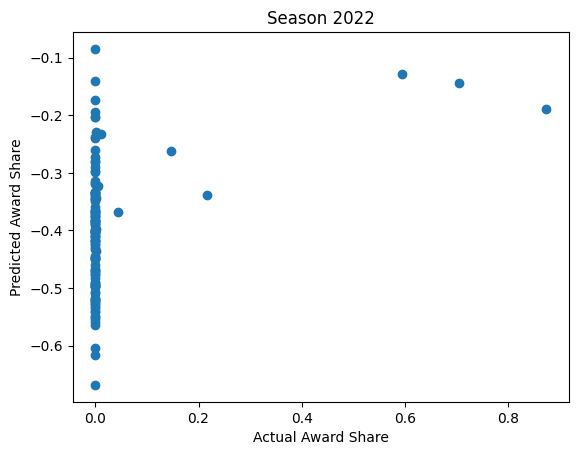

Real MVP during 2022 season: Nikola Jokić
Top 3 MVP Prediction for: 2022
1. Dillon Brooks --> Predicted Award Share: -0.0847855806350708
2. Giannis Antetokounmpo --> Predicted Award Share: -0.12794744968414307
3. Kristaps Porziņģis --> Predicted Award Share: -0.1406673640012741


FINAL RESULTS:
Exact NBA MVP correctly predicted: 0.0%
NBA MVP correctly predicted in TOP 3: 0.0%




In [ ]:

# Using ensemble neural network
num_models = 5
ensemble_models = []

mvp_count_top_3 = 0
exact_mvp_count = 0

# Training model and running it on every season from 1983 to 2022
for season in range(1983, 2023):
    # Create train and test data for the current season
    df_train_data = df[(df["season"] < season) | (df["season"] > season)]
    df_test_data = df[df["season"] == season]

    X_train = df_train_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])
    X_test = df_test_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])

    y_train = df_train_data['award_share']
    y_test = df_test_data['award_share']

    for i in range(num_models):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='linear')
        ])


        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

        ensemble_models.append(model)


    y_preds_ensemble = np.mean([model.predict(X_test) for model in ensemble_models], axis=0)

    plt.scatter(y_test, y_preds_ensemble)
    plt.xlabel('Actual Award Share')
    plt.ylabel('Predicted Award Share')
    plt.title(f'Season {season}')
    plt.show()


    # Filter the data for the particular season
    season_data = df[df["season"] == season]

    # Find the index of the player with the highest award_share
    highest_award_share_index = season_data["award_share"].idxmax()

    # Get the player name and their corresponding award_share
    highest_award_share_player = season_data.loc[highest_award_share_index, "player"]
    highest_award_share_value = season_data.loc[highest_award_share_index, "award_share"]

    print(f"Real MVP during {season} season: {highest_award_share_player}")

    # Sort the ensemble predictions in descending order and get the top 3 indices
    sorted_indices = np.argsort(y_preds_ensemble[:, 0])[::-1]
    top_3_indices = sorted_indices[:3]  # Get the first three indices

    # Get the corresponding player names and predicted award shares for the top 3 predictions
    top_3_player_names = df_test_data.iloc[top_3_indices]['player']
    top_3_predicted_award_shares = y_preds_ensemble[top_3_indices][:, 0]

    # Print the top 3 predicted award shares and the corresponding player names
    print("Top 3 MVP Prediction for:", season)
    for i, (award_share, player_name) in enumerate(zip(top_3_predicted_award_shares, top_3_player_names)):
        print(f"{i + 1}. {player_name} --> Predicted Award Share: {award_share}")
        if ((i == 0) & (highest_award_share_player == player_name)):
            exact_mvp_count = exact_mvp_count + 1
        if (highest_award_share_player == player_name):
            mvp_count_top_3 = mvp_count_top_3 + 1
    print("\n")

print("FINAL RESULTS:")
print(f"Exact NBA MVP correctly predicted: {(exact_mvp_count/40)*100}%")
print(f"NBA MVP correctly predicted in TOP 3: {(mvp_count_top_3/40)*100}%")
print("\n")


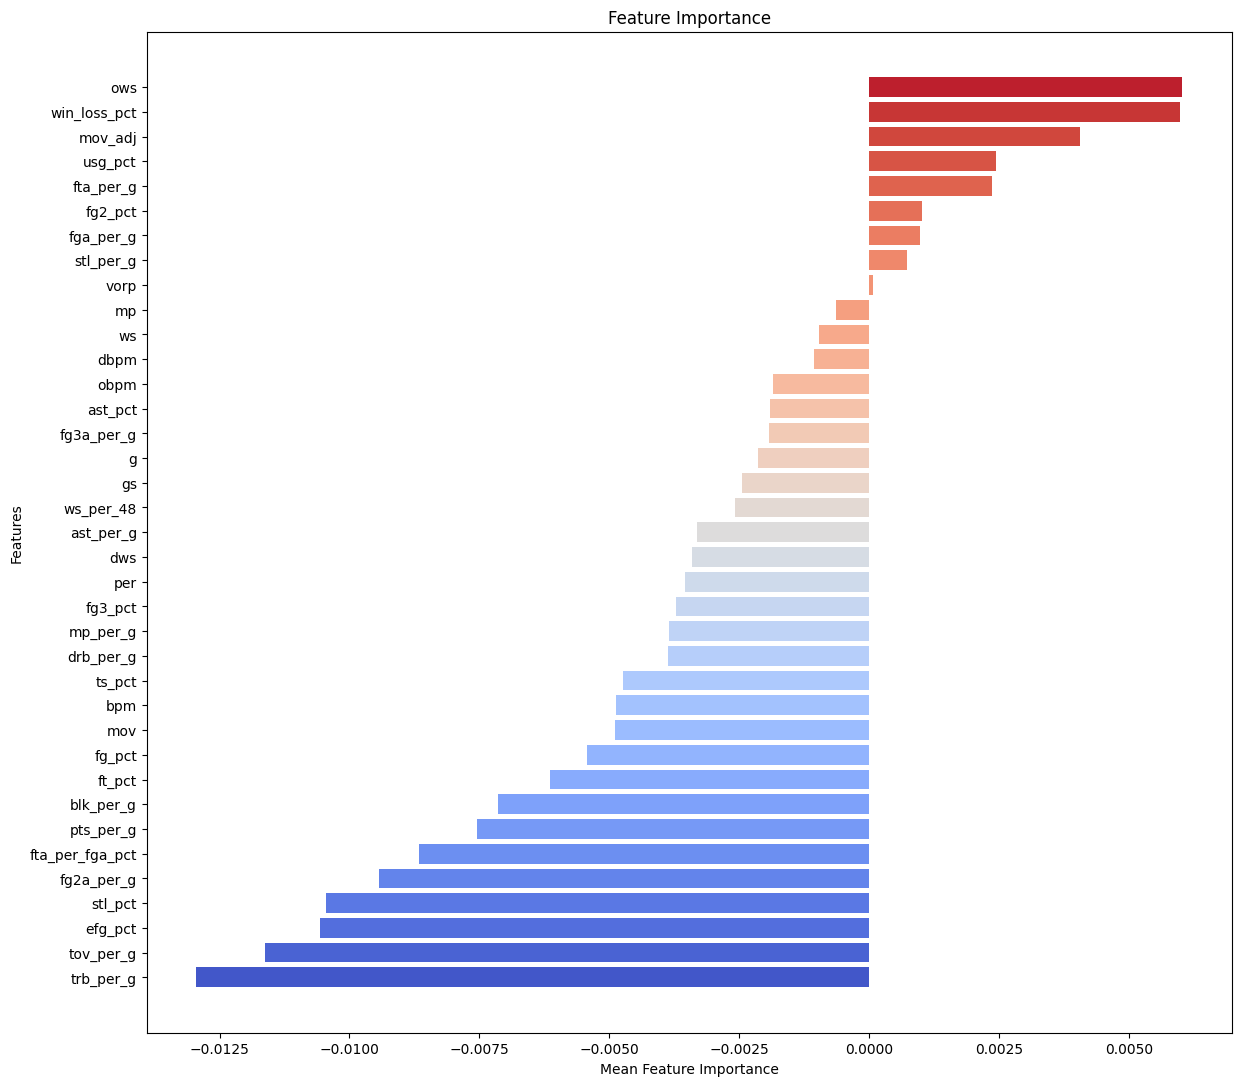

In [ ]:
#graphing feature importance

feature_importance_scores = np.mean([model.layers[0].get_weights()[0] for model in ensemble_models], axis=0)

feature_names = X_train.columns

# Calculate mean importance scores across all features
mean_importance_scores = np.mean(feature_importance_scores, axis=1)

# Sort feature names and importance scores in ascending order
sorted_indices = np.argsort(mean_importance_scores)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = [mean_importance_scores[i] for i in sorted_indices]

# Create a color map for heatmap-like colorway
cmap = sns.color_palette("coolwarm", n_colors=len(sorted_feature_names))

# Create a bar chart for feature importance with heatmap-like colorway
plt.figure(figsize=(14, 13))
bars = plt.barh(sorted_feature_names, sorted_importance_scores, color=cmap)
plt.xlabel('Mean Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [ ]:


# Using ensemble neural network
num_models = 5
ensemble_models = []

mvp_count_top_3 = 0
exact_mvp_count = 0


# Training model and running it on every season from 1983 to 2022
for season in range(2005, 2019):
    # Create train and test data for the current season
    df_train_data = df[(df["season"] < season) | (df["season"] > season)]
    df_test_data = df[df["season"] == season]

    X_train = df_train_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])
    X_test = df_test_data.drop(columns=['award_share', 'player', 'team_id', 'season', "age", 'pos'])

    y_train = df_train_data['award_share']
    y_test = df_test_data['award_share']


    for i in range(num_models):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='linear')
        ])


        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

        ensemble_models.append(model)


    y_preds_ensemble = np.mean([model.predict(X_test) for model in ensemble_models], axis=0)
    #plt.scatter(y_test, y_preds_ensemble)
    #plt.xlabel('Actual Award Share')
    #plt.ylabel('Predicted Award Share')
    #plt.title(f'Season {season}')
    #plt.show()


    # Filter the data for the particular season
    season_data = df[df["season"] == season]

    # Find the index of the player with the highest award_share
    highest_award_share_index = season_data["award_share"].idxmax()

    # Get the player name and their corresponding award_share
    highest_award_share_player = season_data.loc[highest_award_share_index, "player"]
    highest_award_share_value = season_data.loc[highest_award_share_index, "award_share"]

    #print(f"Real MVP during {season} season: {highest_award_share_player}")

    # Sort the ensemble predictions in descending order and get the top 3 indices
    sorted_indices = np.argsort(y_preds_ensemble[:, 0])[::-1]
    top_3_indices = sorted_indices[:5]  # Get the first three indices

    # Get the corresponding player names and predicted award shares for the top 3 predictions
    top_3_player_names = df_test_data.iloc[top_3_indices]['player']
    top_3_predicted_award_shares = y_preds_ensemble[top_3_indices][:, 0]

    # Print the top 3 predicted award shares and the corresponding player names
    print("Top 5 MVP Prediction for:", season)
    for i, (award_share, player_name) in enumerate(zip(top_3_predicted_award_shares, top_3_player_names)):
        print(f"{i + 1}. {player_name} --> Predicted Award Share: {award_share}")
        if ((i == 0) & (highest_award_share_player == player_name)):
            exact_mvp_count = exact_mvp_count + 1
        if (highest_award_share_player == player_name):
            mvp_count_top_3 = mvp_count_top_3 + 1
    print("\n")

print("FINAL RESULTS:")
print(f"Exact NBA MVP correctly predicted: {(exact_mvp_count/40)*100}%")
print(f"NBA MVP correctly predicted in TOP 3: {(mvp_count_top_3/40)*100}%")
print("\n")




all_weights = [model.layers[0].get_weights()[0] for model in ensemble_models]

# Calculate the average weights across all models
average_weights = np.mean(all_weights, axis=0)

# Calculate the absolute values of the average weights
absolute_average_weights = np.abs(average_weights)

# Calculate the feature importance scores by normalizing the absolute average weights
feature_importance_scores = absolute_average_weights / np.sum(absolute_average_weights)

# Get the feature names from your X_train data
feature_names = X_train.columns

# Plot the feature importance scores
average_feature_importance_scores = np.mean(feature_importance_scores, axis=1)

# Sort the feature names and importance scores together
sorted_indices = np.argsort(average_feature_importance_scores)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = average_feature_importance_scores[sorted_indices]

# Plot the sorted average feature importance scores
plt.figure(figsize=(15, 15))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Average Feature Importance Score')
plt.ylabel('Feature')
plt.title('Overall Average Feature Importance (Least to Greatest)')
plt.show()







KeyboardInterrupt: ignored

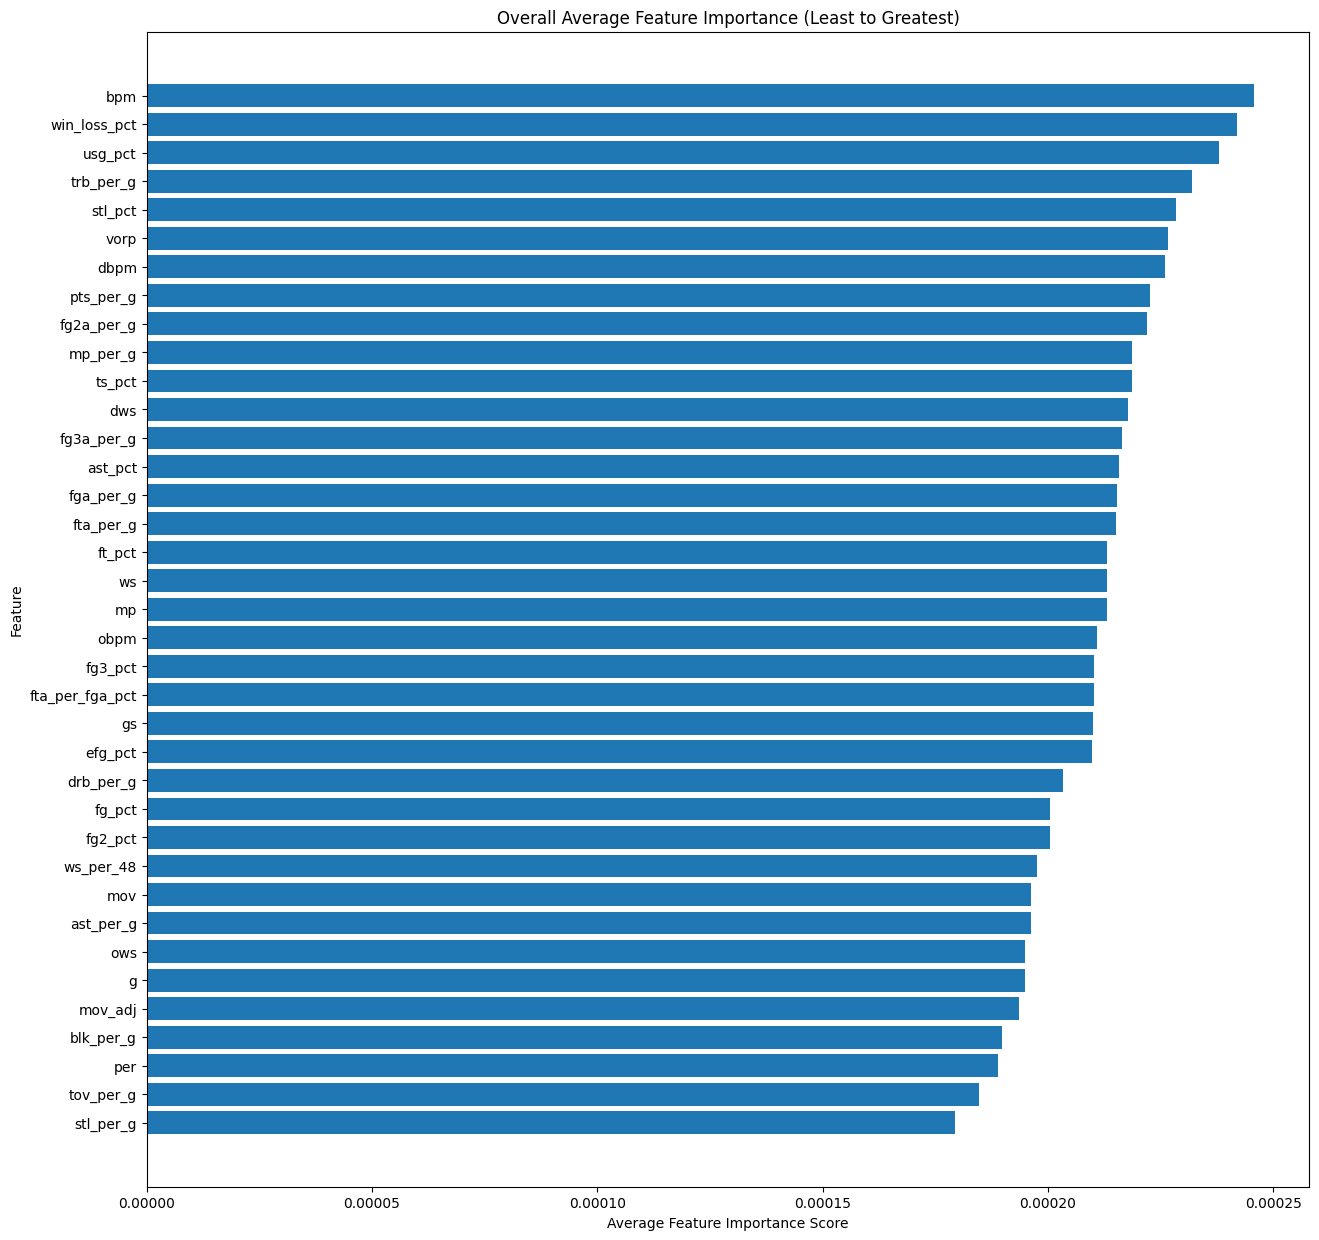

In [ ]:
all_weights = [model.layers[0].get_weights()[0] for model in ensemble_models]

# Calculate the average weights across all models
average_weights = np.mean(all_weights, axis=0)

# Calculate the absolute values of the average weights
absolute_average_weights = np.abs(average_weights)

# Calculate the feature importance scores by normalizing the absolute average weights
feature_importance_scores = absolute_average_weights / np.sum(absolute_average_weights)

# Get the feature names from your X_train data
feature_names = X_train.columns

# Plot the feature importance scores
average_feature_importance_scores = np.mean(feature_importance_scores, axis=1)

# Sort the feature names and importance scores together
sorted_indices = np.argsort(average_feature_importance_scores)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = average_feature_importance_scores[sorted_indices]

# Plot the sorted average feature importance scores
plt.figure(figsize=(15, 15))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Average Feature Importance Score')
plt.ylabel('Feature')
plt.title('Overall Average Feature Importance (Least to Greatest)')
plt.show()